<a href="https://colab.research.google.com/github/Jeonghyekyo/Python/blob/main/%EA%B3%BC%EC%A0%9C7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 202203280 정혜교
# 숙제 1

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split, KFold

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import tensorflow as tf

np.random.seed(3)
tf.random.set_seed(3)

df = pd.read_csv("/content/heart disease classification dataset.csv")

df = pd.get_dummies(df)

df = df.fillna(df.mean())

Standardization_df = (df - df.mean())/df.std()

X = Standardization_df.iloc[:,1:15]
y = df.iloc[:,15]

cols_train=['age','sex_male','sex_female','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
X_train_pre = df[cols_train]

y = df['target_yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

model = Sequential()
model.add(Dense(400, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(6000, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer ='adam', loss = 'mean_squared_error', metrics=['accuracy'])

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

modelpath="./data/model/Ch15-house.hdf5"

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=60, callbacks=[early_stopping_callback, checkpointer])



Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_122 (Dense)           (None, 400)               6000      
                                                                 
 dense_123 (Dense)           (None, 6000)              2406000   
                                                                 
 dropout_33 (Dropout)        (None, 6000)              0         
                                                                 
 dense_124 (Dense)           (None, 1)                 6001      
                                                                 
Total params: 2,418,001
Trainable params: 2,418,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
4/4 [==============================] - 1s 125ms/step - loss: 0.1670 - accuracy: 0.7604 - val_loss: 0.1607 - val_accuracy: 0.7455
Epoch 2/100
4/4 [=================

In [ ]:
model = Sequential()
model.add(Dense(400,  input_dim=X_test.shape[1], activation='relu'))
model.add(Dense(6000, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
modelpath="./data/model/Ch15-house.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

history_2=model.fit(X_test, y_test, epochs=100, batch_size=60)

Epoch 1/100
1/1 [==============================] - 0s 480ms/step - loss: 0.2586 - accuracy: 0.3871
Epoch 2/100
1/1 [==============================] - 0s 42ms/step - loss: 0.1220 - accuracy: 0.8710
Epoch 3/100
1/1 [==============================] - 0s 36ms/step - loss: 0.0813 - accuracy: 0.9032
Epoch 4/100
1/1 [==============================] - 0s 34ms/step - loss: 0.0560 - accuracy: 0.9355
Epoch 5/100
1/1 [==============================] - 0s 35ms/step - loss: 0.0382 - accuracy: 0.9677
Epoch 6/100
1/1 [==============================] - 0s 34ms/step - loss: 0.0236 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 36ms/step - loss: 0.0140 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 35ms/step - loss: 0.0086 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 35ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 34ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 11/100
1/1 [

<function matplotlib.pyplot.show(*args, **kw)>

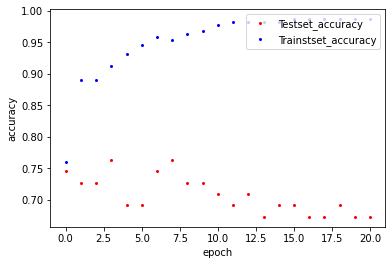

In [ ]:
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vacc, "o", c='red', markersize=2, label='Testset_accuracy')
plt.plot(x_len, y_acc, "o", c='blue', markersize=2, label='Trainstset_accuracy')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show

In [ ]:
# 202203280 정혜교
# 숙제 2 k겹 교차 검증

k=6

kfold = KFold(n_splits=k, shuffle=True)

acc_score = []

def model_fn():
    model = Sequential() 
    model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

for train_index , test_index in kfold.split(X):  
    X_train , X_test = X.iloc[train_index,:], X.iloc[test_index,:]  
    y_train , y_test = y.iloc[train_index], y.iloc[test_index]

    model = model_fn()
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history=model.fit(X_train, y_train, epochs=100, batch_size=20, verbose=0) 
    
    accuracy = model.evaluate(X_test, y_test)[1]  
    acc_score.append(accuracy) 

avg_acc_score = sum(acc_score)/6

print('정확도:', acc_score)
print('정확도 평균:', avg_acc_score)

2/2 [==============================] - 0s 8ms/step - loss: 0.7084 - accuracy: 0.7600
정확도: [0.7647058963775635, 0.7254902124404907, 0.7647058963775635, 0.8199999928474426, 0.800000011920929, 0.7599999904632568]
정확도 평균: 0.7724836667378744
